<a href="https://colab.research.google.com/github/SushanthKumble/simple-handwritten-digits-identification-using-CNN/blob/main/simple_handwritten_digits_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy matplotlib keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Pre-process the data
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# Reshape the data to add a channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


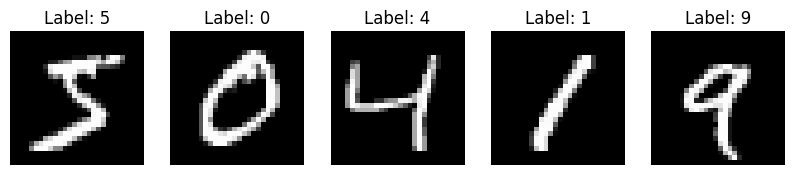

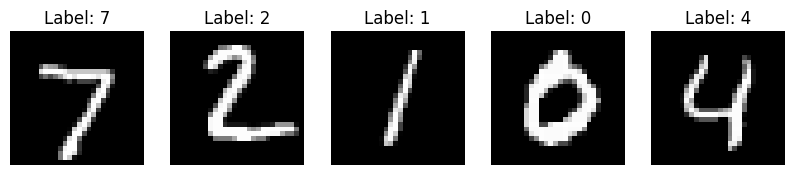

In [9]:
# Print basic information about the dataset
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Visualize a few samples from the dataset
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title("Label: {}".format(np.argmax(labels[i])))
        plt.axis('off')
    plt.show()

# Display a few training samples
display_images(X_train, y_train)

# Display a few testing samples
display_images(X_test, y_test)


In [10]:
# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1560 - accuracy: 0.9517 - val_loss: 0.0467 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0336 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0416 - accuracy: 0.9864 - val_loss: 0.0315 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0260 - val_accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0317 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0249 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0210 -

1/1 [==============================] - 0s 50ms/step
[[1.0908558e-11 8.3428048e-08 2.6271362e-06 9.9992442e-01 5.6718596e-10
  7.2611372e-05 3.2280166e-08 3.4469694e-09 2.5434255e-07 9.6867376e-09]]
3


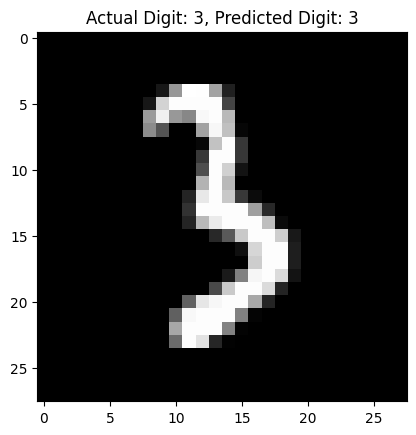

In [21]:
import matplotlib.pyplot as plt
sample_index = 44
one_test_sample = X_test[sample_index]
one_test_sample = np.expand_dims(one_test_sample, axis=0)
predictions = model.predict(one_test_sample)

# Print or use the prediction as needed
predicted_digit = np.argmax(predictions)
actual_digit = np.argmax(y_test[sample_index])  # If one-hot encoded labels are used
print(predictions)
print(predicted_digit)
# Display the image
plt.imshow(one_test_sample.reshape(28, 28), cmap='gray')
plt.title(f"Actual Digit: {actual_digit}, Predicted Digit: {predicted_digit}")
plt.show()


In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.0258 - accuracy: 0.9927
Loss:  0.025800878182053566
Accuracy:  0.9926999807357788


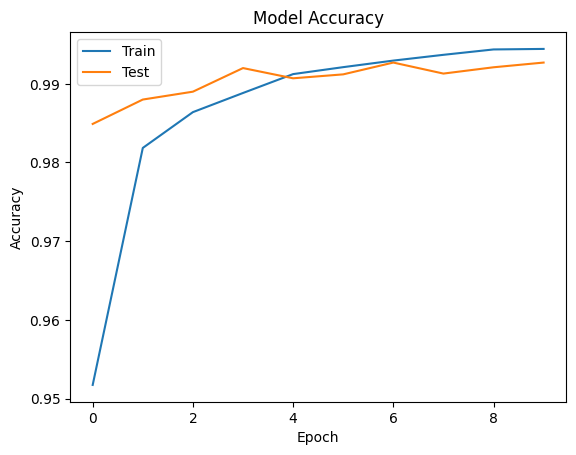

In [18]:
# Extract the accuracy history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy history
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()